In [1]:
import numpy as np
import pandas as pd
import igraph as ig
import vmlab

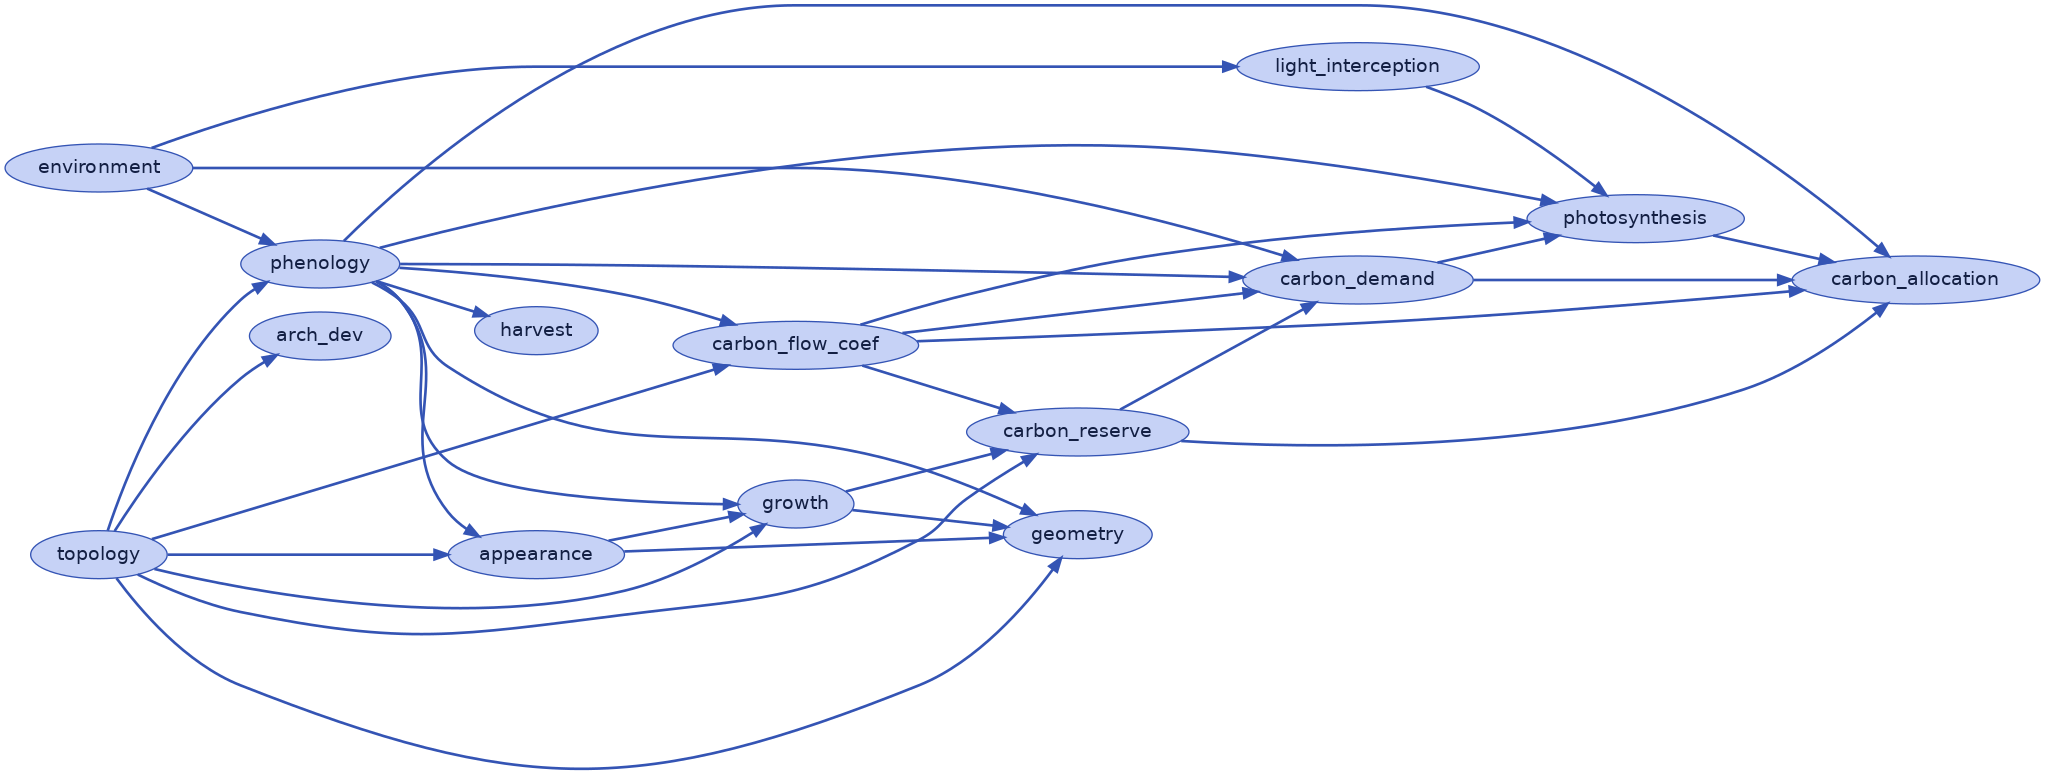

In [2]:
from vmlab.models import fruit_model
fruit_model = fruit_model.drop_processes(['fruit_quality','fruit_composition'])
fruit_model.visualize()

In [3]:
tree = pd.DataFrame({
    'parent_id': [np.nan, 0, 1, 1],
    'id': [0, 1, 2, 3],
    'topology__is_apical': [1, 1, 0, 1],
    'arch_dev__pot_flowering_date': ['NaT', 'NaT', 'NaT', '2002-09-01'],
    'arch_dev__pot_nb_inflo': [0, 0, 0, 1],
    'arch_dev__pot_nb_fruit': [0, 0, 0, 1],
    'growth__radius_gu': [2, 1, 0.5, 0.5],
    'growth__nb_leaf': [0, 10, 5, 10],
    'appearance__final_length_gu': [20, 30, 10, 20],
    'light_interception__sunlit_fraction_col': [1, 2, 3, 4]
})

In [4]:
graph = vmlab.load_graph(tree)
vmlab.check_graph(graph)

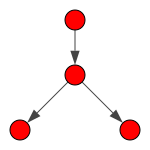

In [5]:
ig.plot(graph, bbox=(0,0,150,150), layout=graph.layout_reingold_tilford())

In [6]:
setup = vmlab.create_setup(
    model=fruit_model,
    tree=tree,
    start_date='2002-06-01',
    end_date='2003-06-01',
    setup_toml='../share/setup/fruit_model.toml',
    current_cycle=3,
    input_vars={
        'topology__seed': 11,
        'carbon_flow_coef__max_distance_to_fruit': 1,
        'geometry__interpretation_freq': 1,
        'growth__leaf_senescence_enabled': False
    },
    output_vars={
        'topology': {
            'adjacency': 'day'
        },
        'environment': {
            'TM': 'day',
            'TM_day': 'day',
            'GR': 'day'
        },
        'photosynthesis': {
            'photo': 'day',
            'Pmax': 'day',
            'D_fruit_avg': 'day'
        },
        'phenology': {
            'inflo_stage': 'day',
            'nb_fruit': 'day',
            'DAFB': 'day',
            'fruit_growth_tts': 'day'
        },
        'carbon_demand': {
            'D_fruit': 'day',
            'MR_stem': 'day',
            'MR_leaf': 'day',
            'MR_fruit': 'day',
            
        },
        'carbon_reserve': {
            'DM_structural_stem': 'day',
            'DM_structural_leaf': 'day',
            'reserve_stem': 'day',
            'reserve_leaf': 'day',
            'reserve_mob': 'day',
            'reserve_nmob_stem': 'day',
            'reserve_nmob_leaf': 'day',
            'reserve_leaf_max': 'day'
        },
        'carbon_allocation': {
            'carbon_supply': 'day',
            'DM_fruit': 'day',
            'reserve_stem_delta': 'day',
            'reserve_leaf_delta': 'day',
            'reserve_nmob_stem_delta': 'day',
            'reserve_nmob_leaf_delta': 'day',
            'remains_1': 'day',
            'required_DM_fruit': 'day'
        },
        'harvest': {
            'ripeness_index': 'day',
            'nb_fruit_harvested': None
        },
        'growth': {
            'nb_leaf': None,
        },
        'light_interception__sunlit_fraction': 'day'
     }
)

In [7]:
ds_out = vmlab.run(setup, fruit_model, geometry=True)

SceneWidget(scenes=[{'id': 'MRONd5GnC4SLcgfP6Sn63CzBr', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

             0% | initialize 

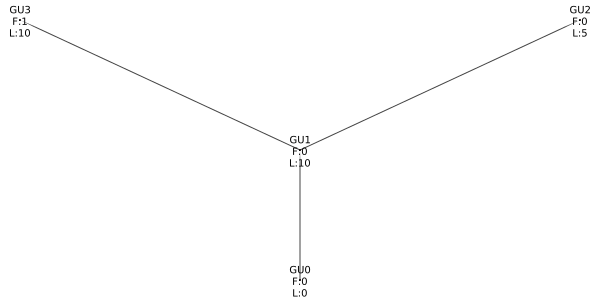

In [8]:
g = ig.Graph.Adjacency([row.tolist() for row in ds_out.topology__adjacency[-1].data.astype(np.int64)])
layout = g.layout_reingold_tilford(root=0.)
layout.rotate(-180)
ig.plot(g, layout=layout, bbox=(600, 300), **{
    'vertex_size': 1,
    'vertex_label_size': 10,
    'edge_arrow_width': 0.1,
    'vertex_label': [
        f'GU{idx}\nF:{int(ds_out.harvest__nb_fruit_harvested.data[idx])}\nL:{int(ds_out.growth__nb_leaf.data[idx])}' for idx in g.vs.indices
    ]
})

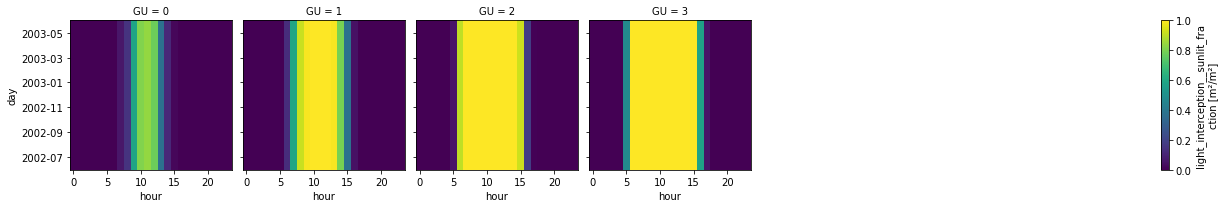

In [9]:
ds_out.light_interception__sunlit_fraction.plot(col='GU', col_wrap=6)

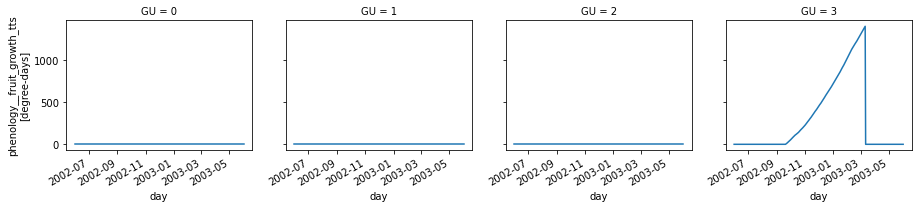

In [10]:
ds_out.phenology__fruit_growth_tts.plot(col='GU', col_wrap=6)

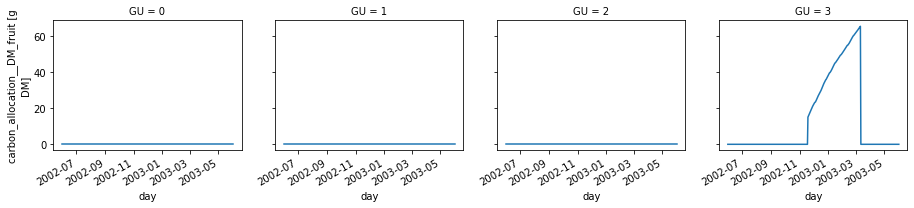

In [11]:
ds_out.carbon_allocation__DM_fruit.plot(col='GU', col_wrap=6)

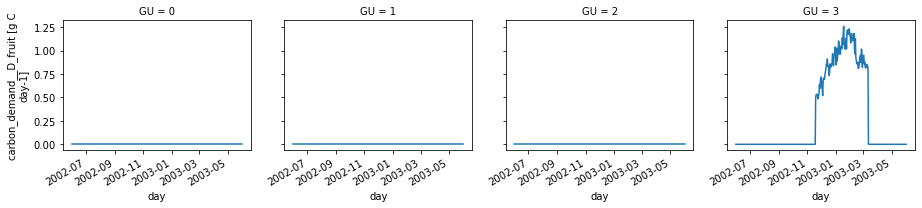

In [12]:
ds_out.carbon_demand__D_fruit.plot(col='GU', col_wrap=6)

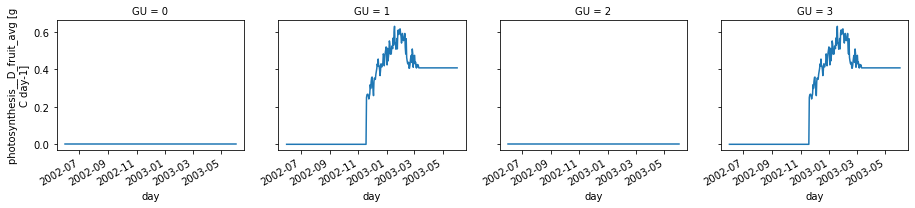

In [13]:
ds_out.photosynthesis__D_fruit_avg.plot(col='GU', col_wrap=6)

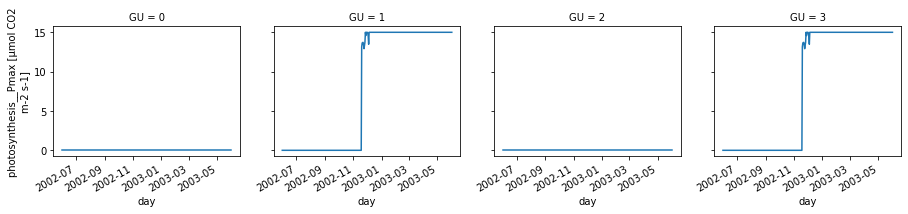

In [14]:
ds_out.photosynthesis__Pmax.plot(col='GU', col_wrap=6)

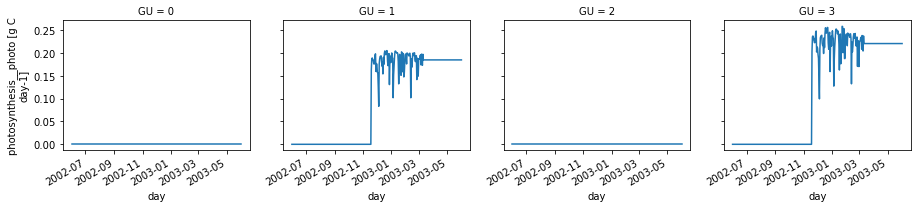

In [15]:
ds_out.photosynthesis__photo.plot(col='GU', col_wrap=6)